In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

print (X[0])
print (X.shape)

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
(506, 13)


In [2]:
y.shape

(506,)

In [3]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [4]:
X[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Least squares regression
theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)

/home/yuvaraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [19]:
print(rank)
print(s)

13
[36.73684455  6.65007508  6.40958943  6.27283093  6.20563321  6.13851174
  5.89225044  5.85114425  5.74237816  5.47143648  5.3073284   5.12045061
  4.756966  ]


In [6]:
# Make predictions on the test data
predictions = np.dot(X_test, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = np.dot(X_train, theta)

In [7]:
# MSE calculation
from sklearn.metrics import mean_squared_error

print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

22.788466263300545
24.965073536616


In [8]:
# MAE calculation
from sklearn.metrics import mean_absolute_error

print (mean_absolute_error(y_test, predictions))
print (mean_absolute_error(y_train, y_true_pred))

3.2556180211042127
3.3694147586998615


In [9]:
# R2 Score calculation
from sklearn.metrics import r2_score

print (r2_score(y_train, y_true_pred))
print (r2_score(y_test, predictions))

0.7093762493190056
0.7089367706511605


In [10]:
X = np.c_[X, np.ones(len(X))]

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Least squares regression
theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)

# Make predictions on the test data
predictions = np.dot(X_test, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = np.dot(X_train, theta)

# MSE calculation
print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

# MAE calculation
print (mean_absolute_error(y_test, predictions))
print (mean_absolute_error(y_train, y_true_pred))

# R2 Score calculation
print (r2_score(y_train, y_true_pred))
print (r2_score(y_test, predictions))

20.902843680372772
22.475403478977515
3.214511781299361
3.349249258000854
0.7383590299644474
0.7330206818709306


/home/yuvaraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


In [11]:
import scipy

### Gradient descent ###

# Objective
def f(theta, X, y, lam):
    theta = np.matrix(theta).T
    X = np.matrix(X)
    y = np.matrix(y).T
    diff = X*theta - y
    diffSq = diff.T*diff
    diffSqReg = diffSq / len(X) + lam*(theta.T*theta)
    #print ("offset =", diffSqReg.flatten().tolist())
    return diffSqReg.flatten().tolist()[0]

# Derivative
def fprime(theta, X, y, lam):
    theta = np.matrix(theta).T
    X = np.matrix(X)
    y = np.matrix(y).T
    diff = X*theta - y
    res = 2*X.T*diff / len(X) + 2*lam*theta
    #print ("gradient =", np.array(res.flatten().tolist()[0]))
    return np.array(res.flatten().tolist()[0])

theta, _, _ = scipy.optimize.fmin_l_bfgs_b(f, [0]*14, fprime, args = (X_train, y_train, 0.1))

# Make predictions on the test data
predictions = np.dot(X_test, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = np.dot(X_train, theta)

# MSE calculation
print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

# MAE calculation
print (mean_absolute_error(y_test, predictions))
print (mean_absolute_error(y_train, y_true_pred))

# R2 Score calculation
print (r2_score(y_train, y_true_pred))
print (r2_score(y_test, predictions))

24.17602383686865
25.349360635617415
3.32841138937405
3.44765695018175
0.7049026811604218
0.6912143410850876


In [12]:
import numpy
import random

def feature():
    return [random.random() for x in range(13)]

X_train2 = [feature() for d in X_train]
X_test2 = [feature() for d in X_test]

theta,residuals,rank,s = numpy.linalg.lstsq(X_train2, y_train)

# Make predictions on the test data
predictions = np.dot(X_test2, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = np.dot(X_train2, theta)

# MSE calculation
print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

92.99756262855203
94.04973434822972


/home/yuvaraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


In [13]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

LassoLarsIC: least angle regression with BIC/AIC criterion

/home/yuvaraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


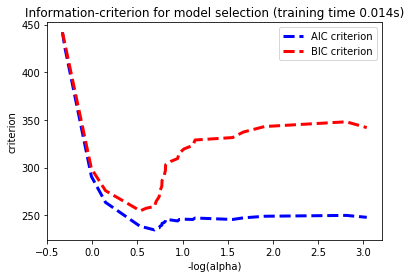

In [14]:
roc_aucmodel_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)
plt.show()

In [37]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=20)